## First attempts at recommending recipes

In [2]:
import surprise

In [3]:
import pandas as pd
import numpy as np
import matplotlib.cm as cmx
import matplotlib.pyplot as plt
import seaborn as sn

#plt.style.use('seaborn-dark')

In [4]:
!ls datasets/food-com-recipes-and-user-interactions/

ingr_map.pkl		interactions_validation.csv  RAW_interactions.csv
interactions_test.csv	PP_recipes.csv		     RAW_recipes.csv
interactions_train.csv	PP_users.csv


In [5]:
train_df = pd.read_csv('./datasets/food-com-recipes-and-user-interactions/interactions_train.csv')
test_df  = pd.read_csv('./datasets/food-com-recipes-and-user-interactions/interactions_test.csv')
valid_df = pd.read_csv('./datasets/food-com-recipes-and-user-interactions/interactions_validation.csv')

In [6]:
train_df

,user_id,recipe_id,date,rating,u,i
0,2046,4684,2000-02-25,5.0,22095,44367
1,2046,517,2000-02-25,5.0,22095,87844
2,1773,7435,2000-03-13,5.0,24732,138181
3,1773,278,2000-03-13,4.0,24732,93054
4,2046,3431,2000-04-07,5.0,22095,101723
...,...,...,...,...,...,...
698896,926904,457971,2018-12-18,5.0,13681,141067
698897,2002312797,27208,2018-12-18,5.0,14897,99787
698898,1290903,131607,2018-12-18,5.0,11605,76163
698899,226867,363072,2018-12-18,5.0,3604,29101


In [7]:
test_df

,user_id,recipe_id,date,rating,u,i
0,8937,44551,2005-12-23,4.0,2,173538
1,56680,126118,2006-10-07,4.0,16,177847
2,349752,219596,2008-04-12,0.0,26,89896
3,628951,82783,2007-11-13,2.0,45,172637
4,92816,435013,2013-07-31,3.0,52,177935
...,...,...,...,...,...,...
12450,101053,179011,2009-01-03,5.0,25054,130258
12451,252205,81398,2005-12-26,2.0,25055,152255
12452,624305,142984,2011-01-15,1.0,25057,139864
12453,173575,104842,2004-12-18,3.0,25059,140646


In [8]:
valid_df

,user_id,recipe_id,date,rating,u,i
0,76535,33627,2005-02-15,4.0,5,177317
1,160497,75307,2005-10-24,4.0,23,170785
2,930021,100961,2008-11-30,4.0,31,165555
3,58439,154105,2007-03-24,4.0,44,177453
4,628951,14525,2008-02-16,5.0,45,142367
...,...,...,...,...,...,...
7018,557416,247915,2007-10-25,5.0,25006,164841
7019,218411,116676,2005-09-21,3.0,25008,117202
7020,587445,206493,2008-07-16,5.0,25009,117301
7021,1724643,65883,2011-11-08,5.0,25047,131974


In [9]:
data = surprise.Dataset.load_from_df(
    train_df[['user_id', 'recipe_id', 'rating']],
    surprise.Reader(rating_scale=(0, 5)))
# ToDo: ignoring 'date' for now

trainset = data.build_full_trainset()

In [10]:
(trainset.global_mean, trainset.rating_scale)

(4.574089892559891, (0, 5))

### Probemos con un sampleo
For now i'll just use 10 % of the trainset

In [11]:
train_df_s = train_df.sample(frac=0.1)
train_df_s

,user_id,recipe_id,date,rating,u,i
194801,189191,167012,2007-02-16,4.0,5359,148146
648841,1411577,23805,2013-02-27,5.0,9995,105877
273816,372643,61474,2007-12-04,5.0,9754,122920
620310,212874,54257,2012-03-23,5.0,5631,52334
481756,939875,48260,2009-10-24,5.0,16366,145693
...,...,...,...,...,...,...
545969,381047,73062,2010-07-02,5.0,2959,92341
240744,47907,188304,2007-08-09,4.0,754,88218
399183,157425,292165,2009-01-11,5.0,243,52633
652132,357071,300143,2013-04-07,5.0,1123,118719


In [12]:
data_s = surprise.Dataset.load_from_df(
    train_df_s[['user_id', 'recipe_id', 'rating']],
    surprise.Reader(rating_scale=(0, 5)))
# ToDo: ignoring 'date' for now

In [13]:
trainset_s = data_s.build_full_trainset()

In [14]:
traintestset = trainset.build_testset()

In [15]:
algo = surprise.SVD()

In [16]:
algo.fit(trainset_s)

In [17]:
predictions = algo.test(traintestset)

In [18]:
surprise.accuracy.rmse(predictions)

RMSE: 0.9109


0.9109351899952333

#### Veamos su accuracy con el testset

In [19]:
test_data = surprise.Dataset.load_from_df(
    test_df[['user_id', 'recipe_id', 'rating']],
    surprise.Reader(rating_scale=(0, 5)))
# ToDo: ignoring 'date' for now

In [20]:
testset = test_data.build_full_trainset().build_testset()

In [21]:
test_preds = algo.test(testset)

In [22]:
surprise.accuracy.rmse(test_preds)

RMSE: 1.3753


1.3752850587413588

### Ahora pruebo con todo el trainset

In [23]:
algo.fit(trainset)

In [24]:
predictions = algo.test(testset)

In [25]:
surprise.accuracy.rmse(predictions)

RMSE: 1.3230


1.322992725003406

In [29]:
len(algo.qi)

160901

### Probemos con folds, solo a partir del trainset

In [25]:
surprise.model_selection.cross_validate(
    algo, data,
    cv=5, n_jobs=-1,
    measures=['rmse', 'mae', 'fcp'], return_train_measures=True, verbose=True)

Evaluating RMSE, MAE, FCP of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9255  0.9126  0.9238  0.9170  0.9229  0.9203  0.0048  
MAE (testset)     0.5440  0.5405  0.5445  0.5415  0.5452  0.5432  0.0018  
FCP (testset)     0.5382  0.5391  0.5256  0.5366  0.5331  0.5345  0.0049  
RMSE (trainset)   0.6459  0.6484  0.6462  0.6470  0.6461  0.6467  0.0009  
MAE (trainset)    0.3879  0.3892  0.3882  0.3889  0.3884  0.3885  0.0005  
FCP (trainset)    0.8224  0.8193  0.8226  0.8223  0.8223  0.8217  0.0012  
Fit time          26.57   26.97   27.08   27.07   28.11   27.16   0.51    
Test time         1.19    1.18    1.15    1.19    1.14    1.17    0.02    


{'test_rmse': array([0.92550478, 0.91257936, 0.92375613, 0.9170023 , 0.92289581]),
 'train_rmse': array([0.64588445, 0.64840317, 0.64624643, 0.64700568, 0.6461208 ]),
 'test_mae': array([0.54401093, 0.54052939, 0.54451862, 0.54151839, 0.54520398]),
 'train_mae': array([0.38787152, 0.38923606, 0.38824783, 0.38885256, 0.38837627]),
 'test_fcp': array([0.53818471, 0.53910351, 0.52556118, 0.53662635, 0.53308897]),
 'train_fcp': array([0.82235037, 0.81926856, 0.82258366, 0.82228715, 0.82225069]),
 'fit_time': (26.57480502128601,
  26.9729425907135,
  27.077647924423218,
  27.066096782684326,
  28.11052680015564),
 'test_time': (1.1910223960876465,
  1.1815454959869385,
  1.1483445167541504,
  1.1851282119750977,
  1.1369853019714355)}

In [26]:
a = train_df.sample(1)
print(algo.predict(uid=int(a['user_id']), iid=int(a['recipe_id'])))
a

user: 243089     item: 149547     r_ui = None   est = 4.17   {'was_impossible': False}


,user_id,recipe_id,date,rating,u,i
193761,243089,149547,2007-02-11,4.0,5386,25176


In [27]:
a = test_df.sample(1)
print(algo.predict(uid=int(a['user_id']), iid=int(a['recipe_id'])))
a

user: 130606     item: 79143      r_ui = None   est = 4.74   {'was_impossible': False}


,user_id,recipe_id,date,rating,u,i
2184,130606,79143,2008-09-23,5.0,4348,143715


In [28]:
predictions = algo.test(testset)

In [29]:
surprise.accuracy.rmse(predictions)

RMSE: 1.3229


1.3228947285653827

#### Quiero ver la distribución del error

In [30]:
predictions[0:5]

[Prediction(uid=8937, iid=44551, r_ui=4.0, est=4.263484794929512, details={'was_impossible': False}),
 Prediction(uid=56680, iid=126118, r_ui=4.0, est=4.781949541747861, details={'was_impossible': False}),
 Prediction(uid=349752, iid=219596, r_ui=0.0, est=4.649307127097701, details={'was_impossible': False}),
 Prediction(uid=628951, iid=82783, r_ui=2.0, est=4.6852887243914125, details={'was_impossible': False}),
 Prediction(uid=92816, iid=435013, r_ui=3.0, est=4.4780331908251885, details={'was_impossible': False})]

In [31]:
# Real ratings
r = [p.r_ui for p in predictions]
# Estimated ratings
r_hat = [p.est for p in predictions]

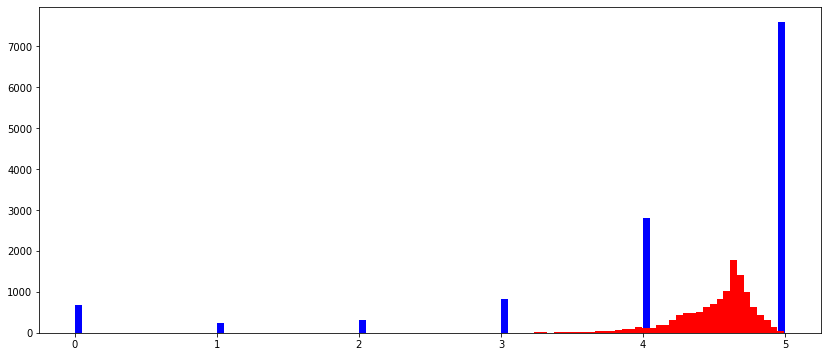

In [32]:
plt.figure(figsize=(14, 6))
plt.hist(r, bins=100, color='blue')
plt.hist(r_hat, bins=100, color='red');

In [33]:
err = [p.est - p.r_ui for p in predictions]

Text(0.5, 1.0, 'Prediction error histogram')

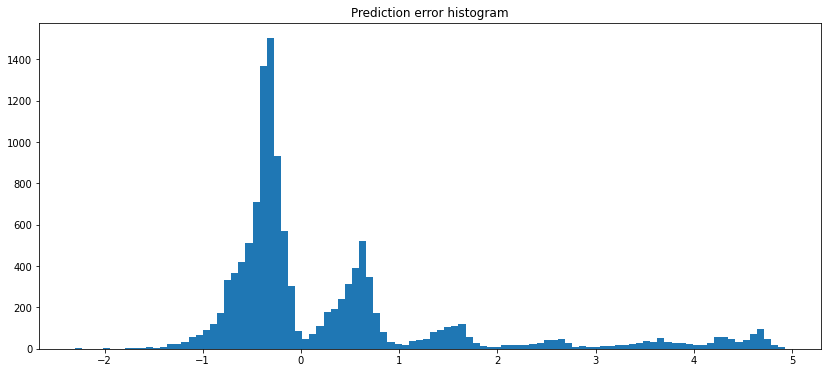

In [34]:
plt.figure(figsize=(14, 6))
plt.hist(err, bins=100)
plt.title('Prediction error histogram')

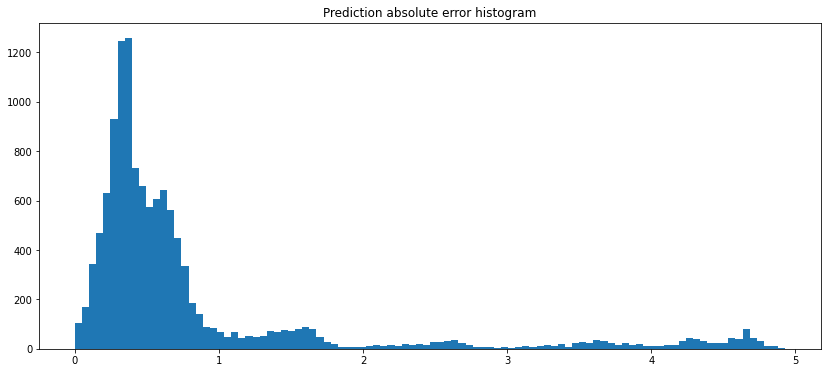

In [35]:
plt.figure(figsize=(14, 6))
plt.hist(np.abs(err), bins=100)
plt.title('Prediction absolute error histogram');

In [36]:
def nice_hist(data_, color='blue'):
    labels, counts = np.unique(data_, return_counts=True)
    plt.bar(labels, counts, color=color)
    plt.gca().set_xticks(labels)

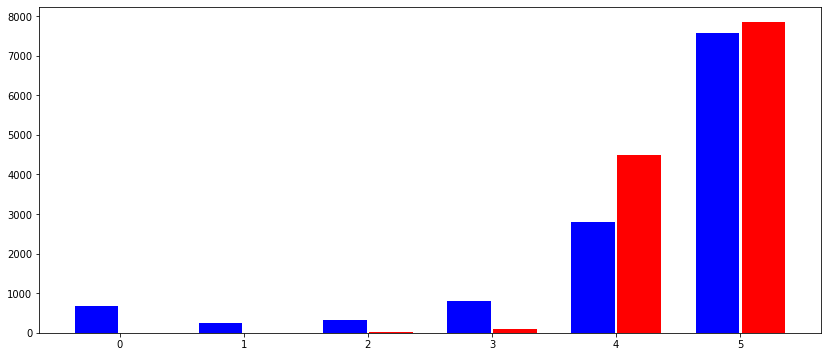

In [64]:
plt.figure(figsize=(14, 6))
labels, counts_r = np.unique(r, return_counts=True)
labels, counts_r_hat = np.unique(np.round(r_hat), return_counts=True)
bar_width = 0.35
plt.bar(labels - bar_width / 2 - 0.01, counts_r, bar_width, color='blue')
plt.bar(labels + bar_width / 2 + 0.01, counts_r_hat, bar_width, color='red')
plt.gca().set_xticks(labels)
plt.show()

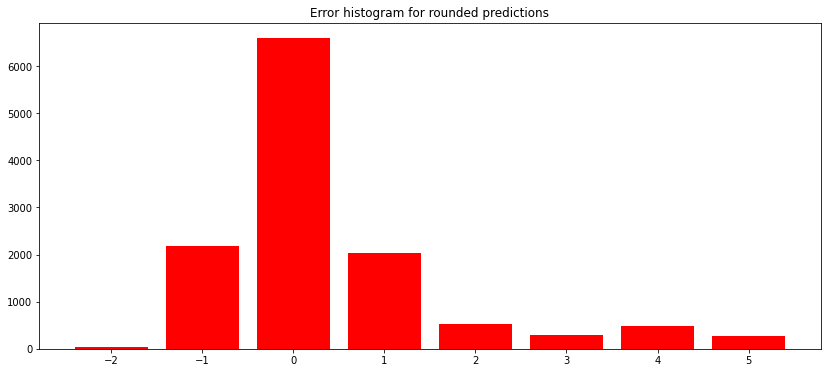

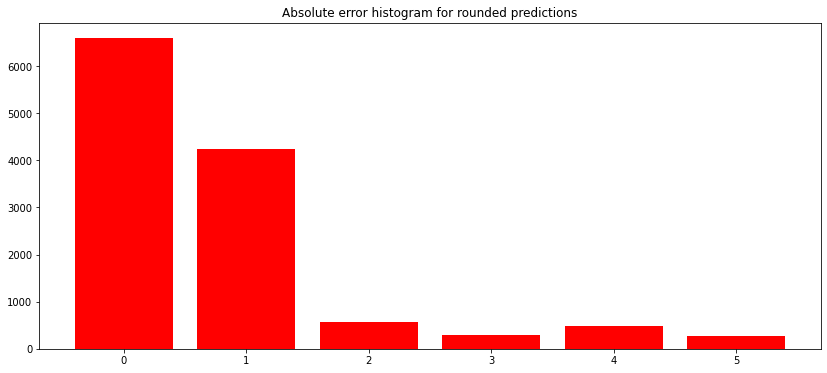

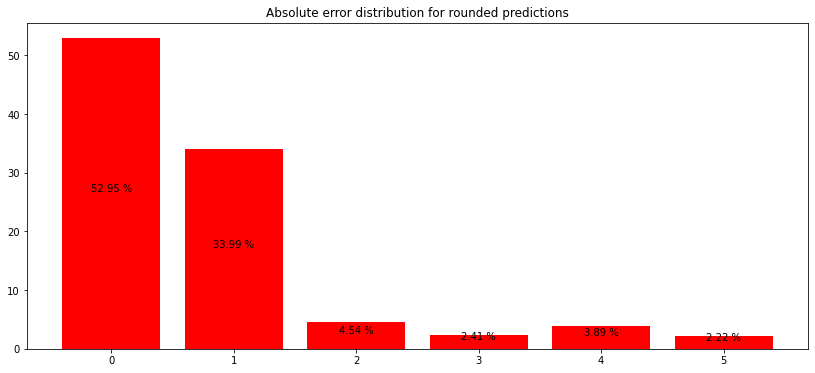

In [38]:
# Round each rating to closest integer, as if that's the prediction, then calculate error
int_errs = [np.round(p.est) - p.r_ui for p in predictions]

plt.figure(figsize=(14, 6))
nice_hist(int_errs, color='red')
plt.title('Error histogram for rounded predictions')

plt.figure(figsize=(14, 6))
nice_hist(np.abs(int_errs), color='red')
plt.title('Absolute error histogram for rounded predictions')

# plt.figure(figsize=(14, 6))
fig, ax = plt.subplots(figsize=(14, 6))
labels, counts = np.unique(np.abs(int_errs), return_counts=True)
rects = plt.bar(labels, 100.0 * counts / sum(counts), color='red')
for rect in rects:
    ax.annotate(
        f'{rect.get_height():.2f} %',
        xy=(rect.get_x() + rect.get_width() / 2, rect.get_height() / 2),
        xytext=(0, 0), textcoords='offset points', ha='center', va='bottom'
    )
plt.gca().set_xticks(labels)

plt.title('Absolute error distribution for rounded predictions')
plt.show()

Acá aparece el bias de reviews a solo ítems de rating alto! Parece que nos equivocamos poco, y lo que pasa es que tenemos buen *accuracy* o *recall* y de los de buen rating pero pésimo para los de poco rating. *Imbalanced classes*.

### Matriz de confusión

In [65]:
confusion_mat = np.zeros((6, 6), dtype=int)
for p in predictions:
    confusion_mat[int(round(p.r_ui))][int(round(p.est))] += 1
confusion_mat

array([[   2,    1,    7,   30,  370,  277],
       [   0,    0,    1,    5,  128,  115],
       [   0,    0,    0,    5,  164,  142],
       [   0,    0,    0,    8,  453,  354],
       [   0,    0,    0,   16, 1208, 1583],
       [   0,    0,    0,   35, 2174, 5377]])

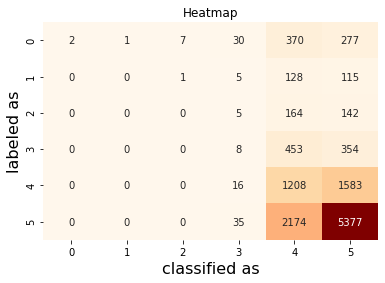

In [74]:
sn.heatmap(
    confusion_mat, annot=True, fmt='d', cmap='OrRd', cbar=False
#    linewidths=.25, xticklabels=lbls, yticklabels=lbls
)
plt.ylabel('labeled as', fontsize=16)
plt.xlabel('classified as', fontsize=16)
plt.title('Heatmap');

Las clasificaciones se concentran a la derecha. Ahora coloreemos separadamente por fila.

In [81]:
confusion_mat_per_row = [[e / sum(row) for e in row] for row in confusion_mat]

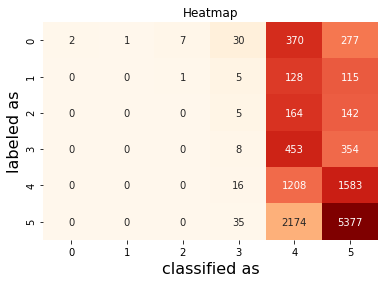

In [82]:
sn.heatmap(
    confusion_mat_per_row, annot=confusion_mat, fmt='d', cmap='OrRd', cbar=False
#    linewidths=.25, xticklabels=lbls, yticklabels=lbls
)
plt.ylabel('labeled as', fontsize=16)
plt.xlabel('classified as', fontsize=16)
plt.title('Heatmap');

In [90]:
correct_per_label = [[row[i] for i, row in enumerate(confusion_mat_per_row)]]

In [1]:
plt.figure(figsize=(10, 2))
sn.heatmap(correct_per_label, fmt='.2f', annot=True, cbar=False, cmap='RdYlGn', linewidths=.5)
plt.title('Correct classifications (recall) per label')

The history saving thread hit an unexpected error (DatabaseError('database disk image is malformed')).History will not be written to the database.


NameError: name 'plt' is not defined

### A continuación quiero medir el top-N por usuario

In [50]:
# Tomado de Surprise/examples/top_n_recommendations.py
from collections import defaultdict

def get_top_n(predictions, n=10):
    '''Return the top-N recommendation for each user from a set of predictions.

    Args:
        predictions(list of Prediction objects): The list of predictions, as
            returned by the test method of an algorithm.
        n(int): The number of recommendation to output for each user. Default
            is 10.

    Returns:
    A dict where keys are user (raw) ids and values are lists of tuples:
        [(raw item id, rating estimation), ...] of size n.
    '''

    # First map the predictions to each user
    top_n = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top_n[uid].append((iid, est))

    # Then sort the predictions for each user and retrieve the n highest ones
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]

    return top_n

In [51]:
predictions = algo.test(testset)

In [52]:
top_n = get_top_n(predictions, n=10)

In [53]:
# Print the recommended items for each user
for uid, user_ratings in top_n.items():
    print(uid, [iid for (iid, _) in user_ratings])

8937 [44551]
56680 [126118]
349752 [219596]
628951 [82783]
92816 [435013]
280271 [228179]
345569 [186470]
724516 [298748]
176615 [118119]
56112 [166712]
537179 [78641]
222478 [437144]
22898 [65976]
857489 [311630]
1056692 [312579]
89831 [74778]
107583 [141156]
461834 [479953]
148715 [99695]
1206102 [207099]
213139 [366693]
128541 [50194]
865936 [221247]
592157 [80001]
323186 [482126]
585496 [173241]
320449 [282862]
220348 [394419]
2324285 [484976]
459426 [223667]
1248992 [223667]
41578 [214340]
583349 [301423]
1363685 [200334]
6357 [51255]
650039 [270812]
326176 [193693]
66983 [99932]
65056 [42144]
430471 [348804]
29655 [212273]
179133 [354719]
560491 [460590]
412530 [107254]
1613349 [130161]
59144 [128299]
1251273 [3665]
527886 [44312]
844554 [286499]
88378 [222461]
900992 [345454]
22973 [44292]
721900 [285589]
28201 [24252]
61660 [21901]
47892 [71223]
412186 [227056]
310518 [298141]
53522 [375281]
840768 [269128]
186855 [170153]
13483 [81808]
60486 [203930]
197788 [225183]
445432 [11

438003 [289674]
421534 [229494]
589101 [229494]
1897199 [320396]
679759 [268515]
219942 [182495]
196819 [127023]
226867 [414568]
366781 [328569]
751353 [180343]
48150 [414094]
219865 [78588]
378624 [174917]
236262 [389135]
130646 [90582]
371055 [258625]
191047 [120308]
116735 [161112]
167225 [50738]
94612 [50738]
246844 [51779]
266745 [217899]
120264 [98930]
1193804 [335449]
1417096 [326455]
612413 [82190]
335999 [497996]
275326 [201818]
472275 [281362]
962690 [349244]
2123645 [477110]
55274 [40522]
756769 [355245]
154588 [190887]
516760 [190887]
428644 [211019]
307559 [13576]
423346 [13576]
125109 [324458]
1349552 [325003]
80079 [16263]
53510 [49430]
57400 [228551]
1426037 [254701]
224235 [298384]
841981 [323596]
569182 [206964]
1866497 [206964]
855623 [336385]
776846 [274832]
105988 [110694]
1654604 [441219]
217724 [162198]
289066 [188488]
1085428 [413468]
591021 [25164]
615591 [296812]
1228911 [486641]
2001747320 [486641]
2001630657 [486641]
321178 [48614]
409136 [253627]
75973 [781

236556 [141064]
603831 [250662]
252409 [71800]
476190 [277867]
51842 [277867]
448204 [313269]
446804 [228191]
483510 [310133]
112111 [70143]
815968 [160435]
371844 [160435]
1275931 [383165]
244809 [268173]
365178 [268173]
180789 [3969]
43846 [29825]
41529 [29825]
128703 [75959]
727685 [251985]
230502 [115917]
106205 [154893]
1226398 [367183]
2000045537 [510670]
27926 [275738]
425559 [273907]
613495 [471660]
138551 [88137]
1350389 [26464]
250427 [290440]
347025 [290440]
140372 [385146]
197433 [209203]
533326 [380725]
135863 [100874]
230834 [182445]
478599 [267734]
134164 [78329]
407283 [99876]
229668 [99876]
310800 [432177]
48388 [249606]
18510 [27840]
181601 [87998]
173522 [9011]
288535 [9011]
688606 [339140]
1773580 [339140]
517709 [141550]
331972 [141550]
1145720 [383159]
141654 [259785]
28846 [21924]
55827 [64737]
23463 [438687]
213864 [124533]
285041 [189322]
577908 [189923]
133865 [404591]
128646 [103093]
467243 [103093]
100337 [58334]
425008 [43996]
687419 [276541]
2000877950 [27

30454 [82598]
156081 [82598]
205134 [293890]
1596334 [38986]
125636 [131199]
526871 [173523]
666128 [133954]
326438 [237748]
20395 [251695]
634257 [314940]
282929 [110517]
1800148863 [503011]
23581 [51090]
79466 [125119]
280696 [125119]
445181 [265367]
6406 [211804]
283514 [391260]
662323 [236369]
60364 [222626]
250795 [222626]
559013 [343762]
441026 [343762]
212478 [225924]
1276163 [225924]
713301 [65395]
784195 [65395]
177062 [19015]
190464 [257744]
429976 [255511]
2304555 [521591]
517298 [351136]
812186 [351136]
221672 [244900]
211329 [469666]
704932 [239412]
195988 [490605]
834650 [266957]
1098269 [178168]
374281 [209276]
465524 [479204]
126270 [85415]
184312 [20775]
69662 [33818]
54278 [55748]
317499 [97453]
1406074 [153291]
358284 [215380]
787329 [291351]
102319 [85791]
2000434454 [177268]
628168 [192159]
382720 [267688]
281586 [267688]
590189 [439473]
69969 [284208]
696417 [188040]
44684 [35983]
59662 [35983]
69498 [409271]
1621363 [409271]
516382 [34258]
100221 [153265]
351205 

162725 [65716]
225368 [27399]
242794 [528122]
54016 [10877]
595840 [274956]
519247 [14204]
492709 [360524]
40493 [34580]
38185 [26274]
11811 [9988]
37077 [27282]
591547 [62647]
2001249838 [411645]
133624 [51768]
340649 [184022]
257546 [222711]
502147 [169620]
12619 [78940]
1376929 [377013]
773414 [267092]
162098 [456346]
184762 [178060]
75490 [54108]
355144 [128932]
720138 [162996]
478507 [263682]
517984 [376800]
1238695 [406100]
868335 [368725]
1109232 [397423]
1590449 [195431]
1344980 [120891]
740255 [299373]
973809 [344214]
117122 [57051]
818380 [132826]
1814950 [187172]
172760 [183328]
174808 [364645]
952865 [446293]
1073245 [350876]
139399 [53969]
181716 [3508]
1399295 [3508]
562747 [280616]
45201 [87292]
246695 [87292]
27366 [368184]
464386 [268531]
181638 [179666]
118898 [179666]
708855 [283352]
168497 [68685]
945239 [313848]
858363 [180369]
1029636 [338133]
91715 [347371]
821430 [116258]
456221 [410098]
10320 [494930]
135171 [310207]
153403 [123719]
211113 [17727]
298801 [34177

219460 [91475]
85703 [71566]
1249676 [255813]
579506 [250596]
99678 [441555]
1041047 [299816]
1655515 [345709]
49611 [205349]
332296 [107959]
505912 [289563]
646669 [152435]
2595 [34114]
719346 [302309]
1320681 [384892]
46172 [42707]
278980 [105087]
387736 [345986]
623349 [132779]
533526 [68282]
806685 [68282]
797631 [68282]
236981 [157179]
390817 [302016]
459008 [385397]
695000 [241215]
510602 [207092]
889318 [94694]
498546 [155117]
578289 [195121]
479756 [275570]
108231 [71468]
136761 [334469]
216321 [364347]
1237086 [27534]
335428 [192030]
961362 [325543]
46269034 [419119]
350910 [360171]
880806 [410136]
2001527511 [533718]
1597692 [329191]
83178 [46219]
1240773 [444055]
1411207 [281722]
37903 [14271]
359051 [199494]
430163 [122934]
503628 [211658]
280813 [198105]
70657 [63686]
354688 [393171]
15077 [238886]
212032 [52977]
604557 [277802]
1022323 [343458]
1074123 [278683]
1311294 [391629]
26657 [291620]
489327 [419619]
1700252 [45381]
1367884 [66129]
1216753 [449919]
1711244 [131207

620842 [270414]
171106 [111487]
1281835 [389620]
1909035 [465338]
1333330 [400052]
486096 [13806]
1056280 [163781]
416380 [346170]
66581 [153423]
136074 [89075]
674870 [93321]
351687 [3203]
622213 [338207]
225349 [264907]
954959 [321339]
530188 [246171]
975779 [246171]
1924549 [355893]
674053 [362642]
1198867 [418570]
509942 [204275]
256158 [279013]
1551308 [492064]
479085 [241937]
351398 [108930]
119192 [419529]
529514 [238124]
646969 [28202]
235456 [255335]
184552 [106573]
491440 [290999]
697813 [383247]
668254 [374261]
705794 [167706]
531712 [272406]
25483 [22160]
809596 [343274]
526743 [228764]
834057 [473175]
372186 [152972]
368526 [78742]
70702 [64133]
52525 [37443]
574331 [37443]
576839 [94668]
547279 [314112]
320949 [128780]
336503 [234598]
145580 [302103]
324310 [215745]
1466341 [272898]
1361848 [505179]
1022273 [412798]
565828 [208303]
156337 [170915]
51633 [30321]
1366128 [201076]
643099 [201076]
234776 [420942]
2000705001 [517099]
867304 [328575]
777802 [325903]
41204 [2187

1793281 [353876]
149445 [350709]
2001898367 [478379]
513947 [307586]
982620 [286120]
58925 [45463]
805131 [343231]
397810 [313158]
20623 [39968]
11032 [131703]
964677 [426903]
642204 [303779]
682882 [219996]
278524 [203108]
408272 [304567]
298704 [373965]
2262743 [389374]
118780 [433959]
494783 [128788]
58569 [87609]
599439 [255937]
98394 [69371]
1086887 [397977]
781525 [153394]
298787 [54273]
79265 [352045]
292868 [360855]
1390242 [354145]
266868 [125891]
1534129 [257905]
320118 [155946]
913784 [296594]
931020 [292988]
2001739925 [528086]
297106 [196974]
1583381 [194124]
589897 [207439]
1562407 [264506]
864553 [171255]
2191480 [401545]
1186060 [231396]
85627 [242189]
160078 [388829]
620345 [188995]
33077 [93388]
362522 [115613]
185562 [194737]
846703 [122644]
680256 [240961]
1189781 [192025]
708539 [373624]
946081 [31509]
109631 [33377]
1677956 [334537]
183844 [78359]
1520017 [335076]
1838847 [92761]
751891 [224516]
535560 [188386]
304687 [48655]
544210 [231946]
621716 [249427]
767039

In [54]:
a = (train_df.groupby('user_id').nunique().shape[0], train_df.shape[0])
a

(25076, 698901)

In [55]:
(test_df.groupby('user_id').nunique().shape[0], test_df.shape[0])

(12455, 12455)

Pues claro que *recall@k* / *precision@k* no sirven de mucho si donde predigo solo hay 1 rating por usuario.

In [56]:
b = (train_df.groupby('recipe_id').nunique().shape[0], train_df.shape[0])
(b, b[0] / b[1])

((160901, 698901), 0.23022001685503382)

In [57]:
c = (test_df.groupby('recipe_id').nunique().shape[0], test_df.shape[0])
(c, c[0] / c[1])

((11695, 12455), 0.9389803291850662)

In [58]:
d = test_df.groupby('recipe_id')['recipe_id'].count()
(d.mean(), d.std())

(1.0649850363403164, 0.2697019258674349)

Aunque sería raro hacerlo al revés (top-N usuarios por receta), tampoco funcionaría mucho. La próxima vez que haga EDA, tengo que ver las diferencias que tenga el testset. Claro que no me sirve de mucho intentar hacer esto sobre el trainset porque con eso fue entrenado el modelo.

In [59]:
'{:,} x {:,} = {:,}'.format(a[0], b[0], a[0] * b[0])

'25,076 x 160,901 = 4,034,753,476'

4 mil millones de datos suena a un montón pero puede ser potable, probemos...

In [60]:
#anti_testset = trainset.build_anti_testset()

No resultó, me ocupó unos 50 GiB de memoria antes de frenarlo.

Voy a ver de hacerlo con un subconjunto del df para estimar cuánto ocupa un poco a ojo.

In [61]:
print('{:,} items x {:,} users = {:,} / {:,}'.format(
    trainset_s.n_items, trainset_s.n_users,
    trainset_s.n_items * trainset_s.n_users, trainset_s.n_ratings,
))

42,029 items x 13,621 users = 572,477,009 / 69,890


Still a bit big, let's go smaller

In [62]:
# train_df_s2 = train_df.sample(frac=0.1)
# data_s2 = surprise.Dataset.load_from_df(
#     train_df_s2[['user_id', 'recipe_id', 'rating']],
#     surprise.Reader(rating_scale=(0, 5)))
# trainset_s2 = data_s2.

Never mind that, no sé si tiene tanto sentido, revisitar después

Elevemos lo hecho para usar shuffle splits en la cross validation

In [7]:
cv_iterator = surprise.model_selection.split.ShuffleSplit(n_splits=10, test_size=0.2)

In [8]:
algo = surprise.SVD()

surprise.model_selection.cross_validate(
    algo, data, cv=cv_iterator, n_jobs=-1,
    measures=['rmse', 'mae', 'fcp'], return_train_measures=True, verbose=True
)

Evaluating RMSE, MAE, FCP of algorithm SVD on 10 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Fold 7  Fold 8  Fold 9  Fold 10 Mean    Std     
RMSE (testset)    0.9228  0.9269  0.9182  0.9188  0.9165  0.9163  0.9212  0.9249  0.9232  0.9233  0.9212  0.0034  
MAE (testset)     0.5452  0.5469  0.5421  0.5441  0.5415  0.5424  0.5423  0.5448  0.5452  0.5438  0.5438  0.0016  
FCP (testset)     0.5297  0.5312  0.5353  0.5318  0.5315  0.5320  0.5320  0.5267  0.5385  0.5349  0.5324  0.0031  
RMSE (trainset)   0.6458  0.6457  0.6468  0.6472  0.6475  0.6478  0.6458  0.6460  0.6480  0.6460  0.6467  0.0009  
MAE (trainset)    0.3881  0.3881  0.3891  0.3890  0.3893  0.3894  0.3878  0.3878  0.3901  0.3884  0.3887  0.0007  
FCP (trainset)    0.8215  0.8202  0.8218  0.8213  0.8197  0.8224  0.8253  0.8207  0.8193  0.8186  0.8211  0.0018  
Fit time          42.96   47.09   34.41   46.54   33.28   42.28   49.92   45.98   45.76   50.20   43.84   5.54    
Test time         2.

{'test_rmse': array([0.92283284, 0.92691353, 0.91822778, 0.91877547, 0.91650518,
        0.91632823, 0.92115251, 0.9249172 , 0.92315484, 0.92325346]),
 'train_rmse': array([0.6457768 , 0.64571677, 0.64681677, 0.64724535, 0.64745805,
        0.64776055, 0.64577064, 0.64603896, 0.64801673, 0.64599139]),
 'test_mae': array([0.54516406, 0.54687268, 0.54212903, 0.54410547, 0.54149586,
        0.54238911, 0.54227459, 0.54480454, 0.54521387, 0.54378899]),
 'train_mae': array([0.38806391, 0.3881093 , 0.38907755, 0.38901706, 0.38932651,
        0.38937286, 0.38776952, 0.38783539, 0.39005835, 0.3884185 ]),
 'test_fcp': array([0.52966679, 0.53123718, 0.53533044, 0.53179359, 0.53146923,
        0.53202926, 0.53196186, 0.5267343 , 0.5384813 , 0.53492548]),
 'train_fcp': array([0.82151242, 0.820166  , 0.82176625, 0.82132188, 0.81973524,
        0.82239031, 0.82529375, 0.82073364, 0.81926534, 0.81862001]),
 'fit_time': (42.96160316467285,
  47.09210920333862,
  34.413881063461304,
  46.54201436042785

In [ ]:
predictions = algo.test(testset)

(surprise.accuracy.rmse(predictions),
 surprise.accuracy.mae(predictions))

Bueno, el error me dio exactamente igual... qué onda.

## Probemos cada algoritmo

#### Pequeña prueba del SVD++

In [69]:
#algo_svdpp = sp.SVDpp()

algo_svdpp.fit(trainset_s)
predictions_svdpp = algo_svdpp.test(testset)
surprise.accuracy.rmse(predictions_svdpp)

RMSE: 1.3725


1.3725232194088786

In [ ]:
algo_svdpp.fit(trainset)
predictions_svdpp = algo_svdpp.test(testset)
surprise.accuracy.rmse(predictions_svdpp)

In [14]:
benchmark = []

In [15]:
# Basado en https://towardsdatascience.com/building-and-testing-recommender-systems-with-surprise-step-by-step-d4ba702ef80b
import surprise as sp

# algos = [sp.NormalPredictor(), sp.BaselineOnly(), sp.KNNBasic(), sp.KNNWithMeans(),
#          sp.KNNWithZScore(), sp.KNNBaseline(), sp.SVD(), sp.SVDpp(), sp.NMF(),
#          sp.SlopeOne(), sp.CoClustering()]
algos = [sp.NormalPredictor(), sp.BaselineOnly(), sp.KNNBasic(), sp.KNNWithMeans(),
         sp.KNNWithZScore(), sp.KNNBaseline(), sp.SVD(), sp.CoClustering()]
# algos = [sp.SVDpp()]
# algos = [sp.NormalPredictor(), sp.BaselineOnly(), sp.KNNBasic(), sp.KNNWithMeans(),
#          sp.KNNWithZScore(), sp.KNNBaseline(), sp.SVD(), sp.NMF(),
#          sp.SlopeOne(), sp.CoClustering()]
# algos = [sp.NMF(), sp.SlopeOne(), sp.CoClustering()]

# benchmark = []

for algorithm in algos:
    try:
        print(f"\n\n** {algorithm.__class__.__name__} **")
        n_jobs = 2 if 'KNN' in algorithm.__class__.__name__ else -1
        results = sp.model_selection.cross_validate(
            algorithm, data, measures=['rmse', 'mae', 'fcp'], n_jobs=n_jobs,
            cv=5, verbose=True)

        res = pd.DataFrame.from_dict(results).mean(axis=0)
        res = res.append(pd.Series([algorithm.__class__.__name__], index=['Algorithm']))
        benchmark.append(res)
    except BaseException as e:
        print(e)



** NormalPredictor **
Evaluating RMSE, MAE, FCP of algorithm NormalPredictor on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2038  1.2081  1.2002  1.2042  1.2010  1.2035  0.0028  
MAE (testset)     0.7930  0.7953  0.7903  0.7933  0.7917  0.7927  0.0017  
FCP (testset)     0.4727  0.4770  0.4726  0.4642  0.4740  0.4721  0.0043  
Fit time          0.45    0.44    0.60    0.56    0.52    0.51    0.06    
Test time         1.21    1.67    1.58    1.21    1.20    1.37    0.21    


** BaselineOnly **
Evaluating RMSE, MAE, FCP of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.9127  0.9105  0.9114  0.9156  0.9100  0.9121  0.0020  
MAE (testset)     0.5414  0.5410  0.5415  0.5438  0.5419  0.5419  0.0010  
FCP (testset)     0.5604  0.5678  0.5671  0.5721  0.5644  0.5664  0.0039  
Fit time          0.72    0.79    0.90    0.81    0.76    0.79    

In [16]:
pd.DataFrame(benchmark).set_index('Algorithm').sort_values('test_rmse')

,test_rmse,test_mae,test_fcp,fit_time,test_time
Algorithm,,,,,
BaselineOnly,0.912060,0.541899,0.566379,0.794786,1.313549
SVD,0.920360,0.543387,0.534881,30.686534,1.549050
KNNBaseline,0.983380,0.553179,0.557319,24.212939,5.917250
KNNWithMeans,1.004487,0.569370,0.596875,22.468182,5.023321
KNNWithZScore,1.007886,0.560699,0.601810,23.355989,5.552833
CoClustering,1.013608,0.574091,0.540617,19.455413,1.330857
KNNBasic,1.039390,0.581972,0.577445,22.456758,4.753730
NormalPredictor,1.203460,0.792706,0.472095,0.512781,1.374384


Podría mezclar trainset y testset como me vinieron para que el folding se haga sobre más datos. De igual manera la diferencia de tamaño era enorme así que no espero una diferencia significativa.